In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
from sklearn.cluster import KMeans

importer les librairies nécessaires:

1.  import pandas: permet de manipuler aisément les données d'une série ou 
d'un dataFrame,..
2.  import sklearn: est la principale bibliothèque d'outils dédiés au machine learning(kmeans,svm, knn...) et à la data-science dans l'univers Python. (les méthodes de preprocessing: labelEncoder; 
3.  import pickle: importer/exporter un model ML qui est déjà sauvegardé dans un autre fichier
4.  import numpy: NumPy dispose d'un grand nombre de fonctions mathématiques qui peuvent être appliquées directement à un tableau.







In [ ]:
df = pd.read_csv("iris.csv")
#df = df.iloc[:, :-1]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


1.  La fonction pandas read_csv(): est utilisée pour lire un fichier CSV dans une trame de données.
Nous utiliserons la fonction read_csv() pour extraire l'ensemble de données de CSV dans une variable df.
2.  df = df.iloc[:, :-1] : afficher ttes les lignes, et ne pas afficher la dernière colonne.
3.  df.head(): Afficher les 5 premières lignes de la dataset

In [ ]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


Afficher les 5 dernieres lignes de la dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


La fonction info() est utilisée pour afficher un résumé concis d'un DataFrame.

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


describe() est utilisé pour afficher certains détails statistiques de base tels que le centime, la moyenne, la norme, etc. d'une trame de données ou d'une série de valeurs numériques.

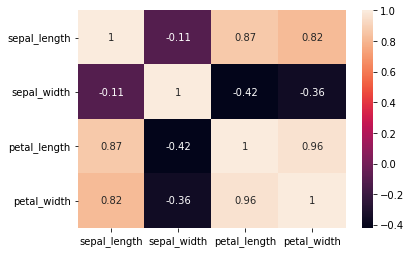

In [ ]:
sns.heatmap(df.corr(), annot = True, linecolor='black')

sns: seaborn python library & Heatmap est une représentation graphique de données 2D. Chaque valeur de données est représentée dans une matrice et a une couleur spéciale.

Chaque carré montre la corrélation entre les variables sur chaque axe. La corrélation va de -1 à +1. Des valeurs plus proches de zéro signifient qu'il n'y a pas de tendance linéaire entre les deux variables. Plus la corrélation est proche de 1, plus elles sont positivement corrélées ; c'est-à-dire que plus l'un augmente, plus l'autre augmente et plus cette relation est proche de 1, plus cette relation est forte. Une corrélation plus proche de -1 est similaire, mais au lieu d'augmenter les deux, une variable diminuera à mesure que l'autre augmentera. Les diagonales sont toutes 1/vert foncé parce que ces carrés corrèlent chaque variable à elle-même (c'est donc une corrélation parfaite). Pour le reste, plus le nombre est grand et la couleur plus foncée, plus la corrélation entre les deux variables est élevée. Le tracé est également symétrique par rapport à la diagonale puisque les deux mêmes variables sont appariées dans ces carrés.

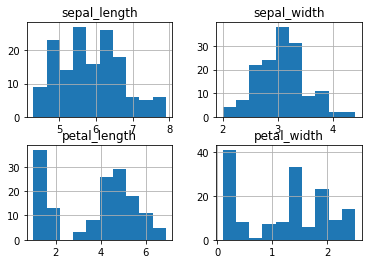

In [ ]:
df.hist()
plt.show()

Hist() : est utilisé pour tracer un histogramme.
et l'afficher

In [ ]:
 #plotting sepal length vs sepal width:
colors = ['red', 'blue', 'green'] #choisir 3 couleurs et attribuer chacune à une fleur
for i, j in enumerate(df.species.unique()):   #i= index, j=class boucle pr passer par ttes les fleurs
  data = df[df.species == j] # filtrer par classe i=species index, j=le type de fleur & on choisit 
                                #juste les lignes qui ont le mm type stocké en j
  plt.scatter(data.iloc[:,0] , data.iloc[:,1], color = colors[i])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width') 
plt.legend()
plt.show()

NameError: ignored

# Nouvelle section

No handles with labels found to put in legend.


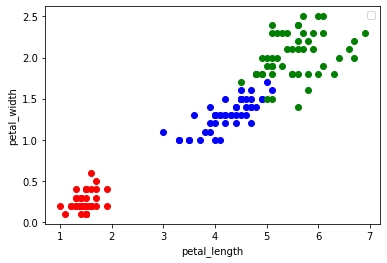

In [ ]:
 #plotting petal length vs petal width:
 colors = ['red', 'blue', 'green']
for i, j in enumerate(df.species.unique()):   #i= indice, j=classe
  data = df[df.species == j]
  plt.scatter(data.iloc[:,2] , data.iloc[:,3], color = colors[i])
plt.xlabel('petal_length')
plt.ylabel('petal_width') 
plt.legend()
plt.show()

In [ ]:
x=df.iloc[:,0:4].values
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
kmeans=KMeans(n_clusters = 3)    #3 classes
kmeans.fit(x)          #training of the model
y_predicted = kmeans.labels_    #predicted target

df2 = pd.DataFrame(x, columns=["sepal_length","sepal_width","petal_length", "petal_width"])
df2['species_predicted'] = y_predicted  #the new predicted target of kmeans
df2.head()   #5 first lines

,sepal_length,sepal_width,petal_length,petal_width,species_predicted
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

No handles with labels found to put in legend.


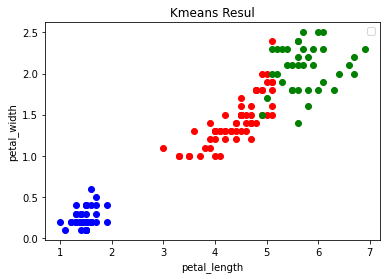

In [ ]:
 #plotting petal length vs petal width:
colors = ['blue', 'red', 'green']
for i in range(3): 
  data = df2[df2.species_predicted == i]
  plt.scatter(data.iloc[:,2] , data.iloc[:,3], color = colors[i])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title("Kmeans Result")
plt.legend()
plt.show() 

No handles with labels found to put in legend.


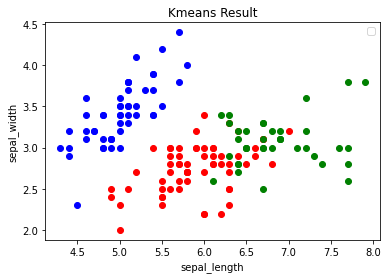

In [ ]:
 #plotting sepal length vs sepal width:
colors = ['blue', 'red', 'green']
for i in range(3): 
  data = df2[df2.species_predicted == i]
  plt.scatter(data.iloc[:,0] , data.iloc[:,1], color = colors[i])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title("Kmeans Result")
plt.legend()
plt.show() 